### Handwritten digit recognition using PyTorch
Source: https://medium.com/@athul929/hand-written-digit-classifier-in-pytorch-42a53e92b63e



In [1]:
import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms

In [2]:
train_dataset = torchvision.datasets.MNIST(root='./data',train=True, transform=transforms.ToTensor(), download=True)

test_dataset = torchvision.datasets.MNIST(root='./data',train=False, transform=transforms.ToTensor(),download = True)


train_loader = torch.utils.data.DataLoader(dataset=train_dataset, batch_size=100, shuffle=True)

test_loader = torch.utils.data.DataLoader(dataset=test_dataset,  batch_size=100, shuffle=False)

### Data visualization
source: https://www.kaggle.com/vincentlefoulon/pytorch-mnist

In [3]:
import matplotlib.pyplot as plt
import numpy as np

# Get current size
fig_size = plt.rcParams["figure.figsize"]
# Set figure width to 12 and height to 9
fig_size[0] = 12
fig_size[1] = 9
plt.rcParams["figure.figsize"] = fig_size
print ("Current size:", fig_size)

def show_batch(batch):
    im = torchvision.utils.make_grid(batch)
    plt.imshow(np.transpose(im.numpy(), (1, 2, 0)))
    #plt.show()

dataiter = iter(train_loader)
images, labels = dataiter.next()

print('Labels: ', labels)
print('Batch shape: ', images.size())
show_batch(images)

('Current size:', [12, 9])
('Labels: ', tensor([5, 7, 3, 7, 4, 9, 8, 1, 5, 1, 2, 2, 2, 7, 8, 2, 9, 2, 2, 2, 7, 0, 3, 1,
        0, 7, 8, 4, 5, 1, 7, 5, 2, 0, 4, 1, 6, 0, 8, 7, 3, 5, 8, 1, 1, 2, 3, 3,
        6, 2, 9, 9, 0, 6, 5, 2, 4, 6, 4, 5, 4, 3, 9, 2, 8, 3, 8, 8, 8, 3, 4, 7,
        8, 0, 8, 5, 8, 0, 2, 9, 7, 0, 2, 7, 7, 4, 1, 6, 2, 3, 0, 7, 7, 4, 0, 2,
        0, 3, 4, 2]))
('Batch shape: ', torch.Size([100, 1, 28, 28]))


### NeuralNet Def

In [4]:
"""A Neural Network with a hidden layer"""
class NeuralNet(nn.Module):
    def __init__(self, input_size,hidden_size,output_size):
        super(NeuralNet, self).__init__()
        self.layer1 = nn.Linear(input_size, hidden_size)
        self.layer2 = nn.Linear(hidden_size, output_size)
        self.relu = nn.ReLU()

    def forward(self, x):
        output = self.layer1(x)
        output = self.relu(output)
        output = self.layer2(output)
        return output

### Parameter Def

In [5]:
input_size = 784
hidden_size = 500
output_size = 10
num_epochs = 5

learning_rate = 0.001

model = NeuralNet(input_size,hidden_size, output_size)

lossFunction = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

### Training

Epoch [1/5], Step [100/600], Loss: 0.2847
Epoch [1/5], Step [200/600], Loss: 0.2578
Epoch [1/5], Step [300/600], Loss: 0.2262
Epoch [1/5], Step [400/600], Loss: 0.1238
Epoch [1/5], Step [500/600], Loss: 0.3093
Epoch [1/5], Step [600/600], Loss: 0.1947
Epoch [2/5], Step [100/600], Loss: 0.1324
Epoch [2/5], Step [200/600], Loss: 0.2155
Epoch [2/5], Step [300/600], Loss: 0.1194
Epoch [2/5], Step [400/600], Loss: 0.1410
Epoch [2/5], Step [500/600], Loss: 0.0897
Epoch [2/5], Step [600/600], Loss: 0.1086
Epoch [3/5], Step [100/600], Loss: 0.1254
Epoch [3/5], Step [200/600], Loss: 0.0236
Epoch [3/5], Step [300/600], Loss: 0.1016
Epoch [3/5], Step [400/600], Loss: 0.1034
Epoch [3/5], Step [500/600], Loss: 0.0315
Epoch [3/5], Step [600/600], Loss: 0.0452
Epoch [4/5], Step [100/600], Loss: 0.0587
Epoch [4/5], Step [200/600], Loss: 0.1506
Epoch [4/5], Step [300/600], Loss: 0.0098
Epoch [4/5], Step [400/600], Loss: 0.0715
Epoch [4/5], Step [500/600], Loss: 0.0548
Epoch [4/5], Step [600/600], Loss:

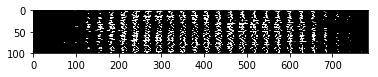

In [6]:
total_step = len(train_loader)
for epoch in range(num_epochs):
    for i, (images,labels) in enumerate(train_loader):
        images = images.reshape(-1,28*28)
        show_batch(images)
        out = model(images)
        loss = lossFunction(out,labels)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        if (i+1) % 100 == 0:
            print('Epoch [{}/{}], Step [{}/{}], Loss: {:.4f}' .format(epoch+1, num_epochs, i+1, total_step, loss.item()))


### Testing

In [11]:
with torch.no_grad():
    correct = 0
    total = 0
    for images,labels in test_loader:
        images = images.reshape(-1,28*28)
        out = model(images)
        _,predicted = torch.max(out.data,1)
        total += labels.size(0)
        correct += (predicted==labels).sum().item()
        print('Accuracy of the network on the 10000 test images: {} %'.format(100.0 * correct / total))

Accuracy of the network on the 10000 test images: 100.0 %
Accuracy of the network on the 10000 test images: 99.5 %
Accuracy of the network on the 10000 test images: 99.0 %
Accuracy of the network on the 10000 test images: 98.5 %
Accuracy of the network on the 10000 test images: 97.8 %
Accuracy of the network on the 10000 test images: 98.0 %
Accuracy of the network on the 10000 test images: 98.0 %
Accuracy of the network on the 10000 test images: 98.125 %
Accuracy of the network on the 10000 test images: 98.2222222222 %
Accuracy of the network on the 10000 test images: 98.0 %
Accuracy of the network on the 10000 test images: 97.9090909091 %
Accuracy of the network on the 10000 test images: 97.9166666667 %
Accuracy of the network on the 10000 test images: 97.5384615385 %
Accuracy of the network on the 10000 test images: 97.3571428571 %
Accuracy of the network on the 10000 test images: 97.5333333333 %
Accuracy of the network on the 10000 test images: 97.4375 %
Accuracy of the network on t